# Interaction Effects in Subinterval Sensitivity Analysis

This jupyter noteboook is designed to show the reproducibility of the research findings presented in the paper "Interaction Effects in Subinterval Sensitivity Analysis".

### Imports

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from intervals import Interval
from intervals.methods import sin
from SSI_Functions import subinterval_outputs_, SSI_subinterval_sensitivity, SSI_subinterval_combined, subint, inflation_index_

from test_plotting import plotbox, plot3dbox, plotwidth, plot3dwidth

In [43]:
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["Times New Roman"]

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath}')

## Section 2.2 - Subinterval sensitivity

Reproducibility of the subinterval outputs of $x_1$ in the Ishigami function (without additional annotations) where $a=5$, $b=0.1$, and all inputs are in range $[-\pi, \pi]$ with $N=50$ subintervals. 

In [44]:
a,b = -np.pi, np.pi
x1 = Interval(a,b)
x2 = Interval(a,b)
x3 = Interval(a,b)
n = 50
x1si = subint(x1,n=n)
x2si = subint(x2,n=n)
x3si = subint(x3,n=n)
X0 = Interval(lo=[-np.pi]*3,hi=[np.pi]*3)

def Ishigami(x): return sin(x[0]) + 5 * sin(x[1])**2 + 0.1*sin(x[0])*x[2]**4

In [45]:
y = Ishigami(X0)
print(f'Function bounds with full interval range for all variables: {y}')
print('...')

y_si, yi_si, y_int, y_int_bounds = SSI_subinterval_combined(X0,n,Ishigami,outputs=True)
print(f'Individual sensitivity indices for all variables in function: {y_si}')
print(f'Inflation indices for all variables: {yi_si}')

Function bounds with full interval range for all variables: [-10.740909103400242,15.740909103400242]
...
Individual sensitivity indices for all variables in function: [0.55959783 0.17373386 0.57342851]
Inflation indices for all variables: [0. 0. 0.]


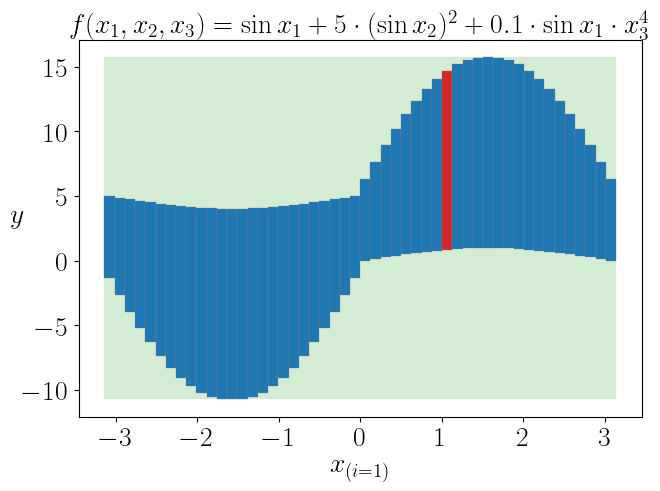

In [46]:
fig,ax1 = plt.subplots(1,1,layout='constrained')
fig,ax1 = plotbox(x1,y,ax=ax1,c='tab:green',alpha=0.2)
for i in range(n):
    if i == 33:
        fig, ax1 = plotbox(x1si[i],y_int[0,i],ax=ax1,c='tab:red')
    else:
        fig,ax1 = plotbox(x1si[i],y_int[0,i],ax=ax1,c='tab:blue')
ax1.set_xticks((np.linspace(-3,3,7)))
ax1.set_xlabel('$x_{(i=1)}$',fontsize=20)
ax1.set_ylabel('$y$',rotation='horizontal',fontsize=20)
ax1.tick_params('both',labelsize=20)
ax1.set_title(r'$f(x_1, x_2, x_3) = \sin x_1 + 5 \cdot (\sin x_2)^2 + 0.1 \cdot \sin x_1 \cdot x_3^4$', fontsize=20)
# plt.savefig('figures/Ishigami_x1.pdf')
plt.show()

## Section 3 - Simultaneous indices

Reproducibility of Fig. 2 from paper (plot of outputs of simultaneous subintervalisation of $x_1$ and $x_2$).

In [47]:
y_si2, yi_si2, y_int2, y_int2_bounds = SSI_subinterval_combined(X0,n,Ishigami,outputs=True,i=[0,1])
print(f'SI_(12) = {y_si2}')
print(f'SI_(1) + SI_(2) = {y_si[0] + y_si[1]}')
print(f'I_(12) = {yi_si2}')
print('...')

SI_(12) = [0.7333317]
SI_(1) + SI_(2) = 0.7333316953232634
I_(12) = [0.]
...


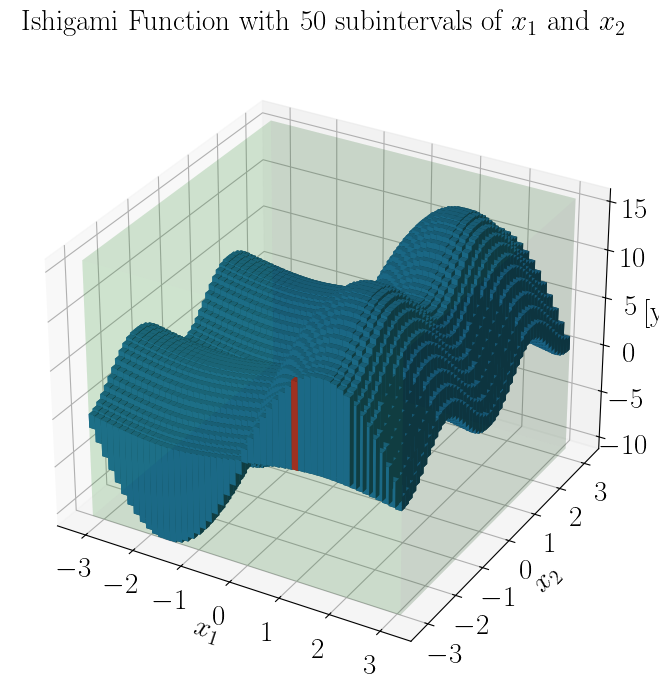

In [48]:
fig = plt.figure(figsize=(7,7),layout='tight')
ax1 = fig.add_subplot(111,projection='3d')
fig,ax1 = plot3dbox(x1,x2,y,ax=ax1,c='tab:green',alpha=0.1)
for i in range(n):
    for j in range(n):
        if i == 33 and j == 0:
            fig, ax1 = plot3dbox(x1si[i],x2si[j],Interval(y_int2[n*i+j,0],y_int2[n*i+j,1]),ax=ax1,c='tab:red')
        else:
            fig,ax1 = plot3dbox(x1si[i],x2si[j],Interval(y_int2[n*i+j,0],y_int2[n*i+j,1]),ax=ax1,c='tab:blue')
ax1.set_xlabel('$x_1$', fontsize=21)
ax1.set_ylabel('$x_2$', fontsize=21)
ax1.set_zlabel('[y]', fontsize=21, rotation=0)
ax1.tick_params('both',labelsize=21)
plt.suptitle(r'Ishigami Function with $50$ subintervals of $x_1$ and $x_2$', fontsize=21, wrap=True)
# plt.savefig('figures/Ishigami_x1x2.pdf')
plt.show()

## Section 4.1 - Linear and additive model

Reproducibility of the results for the function $y = x_1 + x_2 + x_3 + x_4$ where all inputs are in range $[2,4]$ with $N=50$ subintervals.

In [49]:
a,b = 2, 4
x1 = Interval(a,b)
x2 = Interval(a,b)
x3 = Interval(a,b)
x4 = Interval(a,b)
n = 50
x1si = subint(x1,n=n)
x2si = subint(x2,n=n)
x3si = subint(x3,n=n)
x4si = subint(x4,n=n)
X0 = Interval(lo=[a]*4,hi=[b]*4)

def fun_simple(x): return x[0]+x[1]+x[2]+x[3]

In [50]:
y = fun_simple(X0)
print(f'Function bounds with full interval range for all variables: {y}')
print('...')

y_si, yi_si, y_int, y_int_bounds = SSI_subinterval_combined(X0,n,fun_simple,outputs=True)
print(f'Individual sensitivity indices for all variables in function: {y_si}')
print(f'Inflation indices for all variables: {yi_si}')

Function bounds with full interval range for all variables: [8.0,16.0]
...
Individual sensitivity indices for all variables in function: [0.245 0.245 0.245 0.245]
Inflation indices for all variables: [0. 0. 0. 0.]


In [51]:
#Fix with SSI_subinterval_combined
i = [0,1]
y_si2, yi_si2, y_int2_bounds = SSI_subinterval_combined(X0,n,fun_simple,i=i)
print(f'SI_(12) = {y_si2}')
print(f'SI_(1) + SI_(2) = {y_si[0] + y_si[1]}')
print(f'I_(12) = {yi_si2}')
print('...')

i = [0,2]
y_si2a, yi_si2a, y_int2a_bounds = SSI_subinterval_combined(X0,n,fun_simple,i=i)
print(f'SI_(13) = {y_si2a}')
print(f'SI_(1) + SI_(3) = {y_si[0] + y_si[2]}')
print(f'I_(13) = {yi_si2a}')
print('...')

i = [0,3]
y_si2b, yi_si2b, y_int2b_bounds = SSI_subinterval_combined(X0,n,fun_simple,i=i)
print(f'SI_(14) = {y_si2b}')
print(f'SI_(1) + SI_(4) = {y_si[0] + y_si[3]}')
print(f'I_(14) = {yi_si2b}')
print('...')

i = [1,2]
y_si2c, yi_si2c, y_int2c_bounds = SSI_subinterval_combined(X0,n,fun_simple,i=i)
print(f'SI_(23) = {y_si2c}')
print(f'SI_(2) + SI_(3) = {y_si[1] + y_si[2]}')
print(f'I_(23) = {yi_si2c}')
print('...')

i = [1,3]
y_si2d, yi_si2d, y_int2d_bounds = SSI_subinterval_combined(X0,n,fun_simple,i=i)
print(f'SI_(24) = {y_si2d}')
print(f'SI_(2) + SI_(4) = {y_si[1] + y_si[3]}')
print(f'I_(24) = {yi_si2d}')
print('...')

i = [2,3]
y_si2e, yi_si2e, y_int2e_bounds = SSI_subinterval_combined(X0,n,fun_simple,i=i)
print(f'SI_(34) = {y_si2e}')
print(f'SI_(3) + SI_(4) = {y_si[2] + y_si[3]}')
print(f'I_(34) = {yi_si2e}')
print('...')

SI_(12) = [0.49]
SI_(1) + SI_(2) = 0.49000000000000066
I_(12) = [0.]
...
SI_(13) = [0.49]
SI_(1) + SI_(3) = 0.49000000000000066
I_(13) = [0.]
...
SI_(14) = [0.49]
SI_(1) + SI_(4) = 0.49000000000000066
I_(14) = [0.]
...
SI_(23) = [0.49]
SI_(2) + SI_(3) = 0.49000000000000066
I_(23) = [0.]
...
SI_(24) = [0.49]
SI_(2) + SI_(4) = 0.49000000000000066
I_(24) = [0.]
...
SI_(34) = [0.49]
SI_(3) + SI_(4) = 0.49000000000000066
I_(34) = [0.]
...


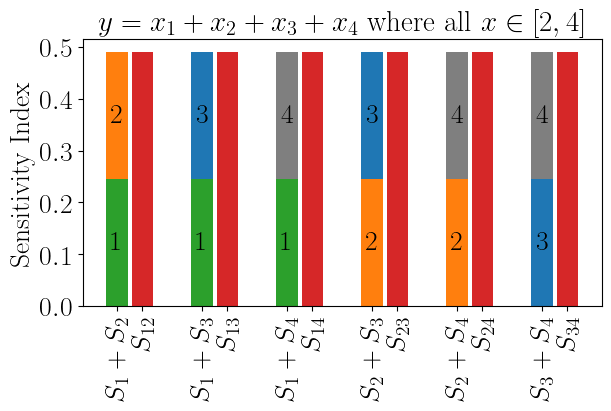

In [52]:
fig,ax = plt.subplots(figsize=(6,4),layout='constrained')

x = np.array([0,0.3,1,1.3,2,2.3,3,3.3,4,4.3,5,5.3])

p1 = ax.bar(x[0::2],(y_si[0],y_si[0],y_si[0],y_si[1],y_si[1],y_si[2]),width=0.25,
       color=('tab:green','tab:green','tab:green','tab:orange','tab:orange','tab:blue'))

p2 = ax.bar(x[0::2],(y_si[1],y_si[2],y_si[3],y_si[2],y_si[3],y_si[3]),width=0.25,
       color=('tab:orange','tab:blue','tab:gray','tab:blue','tab:gray','tab:gray'),
       bottom=(y_si[0],y_si[0],y_si[0],y_si[1],y_si[1],y_si[2]))

q1 = ax.bar(x[1::2],(y_si2[0],y_si2a[0],y_si2b[0],y_si2c[0],y_si2d[0],y_si2e[0]),width=0.25,
       color=('tab:red','tab:red','tab:red','tab:red','tab:red','tab:red'))

ax.set_xticks(x,(r'$S_1+S_2$',r'$S_{12}$',r'$S_1+S_3$',r'$S_{13}$',r'$S_1+S_4$',r'$S_{14}$',r'$S_2+S_3$',r'$S_{23}$',r'$S_2+S_4$',r'$S_{24}$',r'$S_3+S_4$',r'$S_{34}$'),rotation=90,wrap=True,fontsize=20)

ax.bar_label(p1,(r'$1$',r'$1$',r'$1$',r'$2$',r'$2$',r'$3$'),
             label_type='center',fontsize=20)

ax.bar_label(p2,
             (r'$2$',r'$3$',r'$4$',r'$3$',r'$4$',r'$4$'),
             label_type='center',fontsize=20)

ax.set_yticks((np.linspace(0,0.5,6)))
ax.tick_params('y',labelsize=20)
ax.set_ylabel('Sensitivity Index',fontsize=20)
ax.set_title(r'$y = x_1+x_2+x_3+x_4$ where all $x \in [2,4]$', fontsize=21, wrap=True)
# plt.savefig('figures/Linear_combinations.pdf')
plt.show()

## Section 4.2 - Non-linear model with interactions

Comparison of first-order against higher-order subinterval sensitivity for Ishigami function with $N=50$ subintervals used for each variable.

In [53]:
a,b = -np.pi, np.pi
x1 = Interval(a,b)
x2 = Interval(a,b)
x3 = Interval(a,b)
n = 50
X0 = Interval(lo=[-np.pi]*3,hi=[np.pi]*3)

def Ishigami(x): return sin(x[0]) + 5 * sin(x[1])**2 + 0.1*sin(x[0])*x[2]**4

In [54]:
y = Ishigami(X0)
print(f'Function bounds with full interval range for all variables: {y}')
print('...')

y_si_50, yi_si_50, y_int_50, y_int_50_bounds = SSI_subinterval_combined(X0,n,Ishigami,outputs=True)
print(f'Sensitivity indices for all variables in first-order: {y_si_50}')
print(f'Inflation indices for all variables: {yi_si_50}')

Function bounds with full interval range for all variables: [-10.740909103400242,15.740909103400242]
...
Sensitivity indices for all variables in first-order: [0.55959783 0.17373386 0.57342851]
Inflation indices for all variables: [0. 0. 0.]


In [55]:
y_si2_50, yi_si2_50, y_int2_50_bounds = SSI_subinterval_combined(X0,n,Ishigami,i=[0,1])
print(f'SI_(12) = {y_si2_50}')
print(f'SI_(1) + SI_(2) = {y_si_50[0] + y_si_50[1]}')
print(f'I_(12) = {yi_si2_50}')
print('...')

y_si2a_50, yi_si2a_50, y_int2a_50_bounds = SSI_subinterval_combined(X0,n,Ishigami,i=[0,2])
print(f'SI_(13) = {y_si2a_50}')
print(f'SI_(1) + SI_(3) = {y_si_50[0] + y_si_50[2]}')
print(f'I_(13) = {yi_si2a_50}')
print('...')

y_si2b_50, yi_si2b_50, y_int2b_50_bounds = SSI_subinterval_combined(X0,n,Ishigami,i=[1,2])
print(f'SI_(23) = {y_si2b_50}')
print(f'SI_(2) + SI_(3) = {y_si_50[1] + y_si_50[2]}')
print(f'I_(23) = {yi_si2b_50}')

SI_(12) = [0.7333317]
SI_(1) + SI_(2) = 0.7333316953232634
I_(12) = [0.]
...
SI_(13) = [0.79292298]
SI_(1) + SI_(3) = 1.133026344239876
I_(13) = [0.]
...
SI_(23) = [0.74716237]
SI_(2) + SI_(3) = 0.7471623714075919
I_(23) = [0.]


## Section 4.3 - Detecting interactions with low numbers of subintervals

Comparison of first-order against higher-order subinterval sensitivity for Ishigami function with $N=5$ subintervals used for each variable.

In [56]:
a,b = -np.pi, np.pi
x1 = Interval(a,b)
x2 = Interval(a,b)
x3 = Interval(a,b)
n = 5
X0 = Interval(lo=[-np.pi]*3,hi=[np.pi]*3)

def Ishigami(x): return sin(x[0]) + 5 * sin(x[1])**2 + 0.1*sin(x[0])*x[2]**4

In [57]:
y = Ishigami(X0)
print(f'Function bounds with full interval range for all variables: {y}')
print('...')

y_si_5, yi_si_5, y_int_5, y_int_5_bounds = SSI_subinterval_combined(X0,n,Ishigami,outputs=True)
print(f'Sensitivity indices for all variables in first-order: {y_si_5}')
print(f'Inflation indices for all variables: {yi_si_5}')

Function bounds with full interval range for all variables: [-10.740909103400242,15.740909103400242]
...
Sensitivity indices for all variables in first-order: [0.40817231 0.05801998 0.40302819]
Inflation indices for all variables: [0. 0. 0.]


In [58]:
y_si2_5, yi_si2_5, y_int2_5_bounds = SSI_subinterval_combined(X0,n,Ishigami,i=[0,1])
print(f'SI_(12) = {y_si2_5}')
print(f'SI_(1) + SI_(2) = {y_si_5[0] + y_si_5[1]}')
print(f'I_(12) = {yi_si2_5}')
print('...')

y_si2a_5, yi_si2a_5, y_int2a_5_bounds = SSI_subinterval_combined(X0,n,Ishigami,i=[0,2])
print(f'SI_(13) = {y_si2a_5}')
print(f'SI_(1) + SI_(3) = {y_si_5[0] + y_si_5[2]}')
print(f'I_(13) = {yi_si2a_5}')
print('...')

y_si2b_5, yi_si2b_5, y_int2b_5_bounds = SSI_subinterval_combined(X0,n,Ishigami,i=[1,2])
print(f'SI_(23) = {y_si2b_5}')
print(f'SI_(2) + SI_(3) = {y_si_5[1] + y_si_5[2]}')
print(f'I_(23) = {yi_si2b_5}')

SI_(12) = [0.46619229]
SI_(1) + SI_(2) = 0.4661922853642453
I_(12) = [0.]
...
SI_(13) = [0.61735589]
SI_(1) + SI_(3) = 0.8112004984192605
I_(13) = [0.]
...
SI_(23) = [0.46104817]
SI_(2) + SI_(3) = 0.46104816895524947
I_(23) = [0.]


## Figure for Section 4.2 and Section 4.3

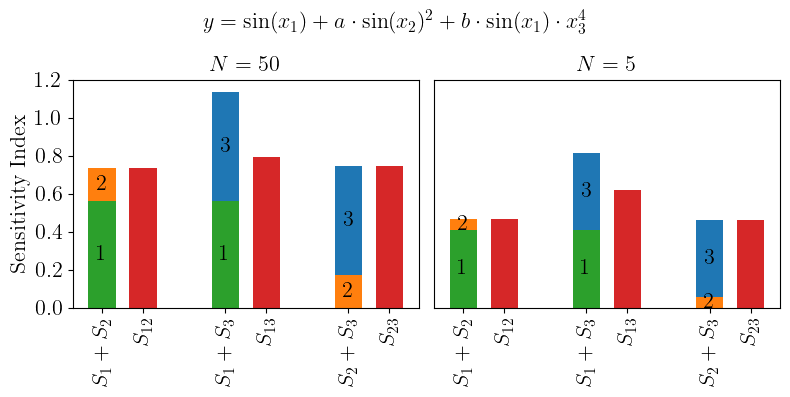

In [59]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(8,4),layout='tight')

x = np.array([0,0.3,0.9,1.2,1.8,2.1])

p1 = ax1.bar(x[0::2],(y_si_50[0],y_si_50[0],y_si_50[1]),width=0.2,
       color=('tab:green','tab:green','tab:orange'))

p2 = ax1.bar(x[0::2],(y_si_50[1],y_si_50[2],y_si_50[2]),width=0.2,
       color=('tab:orange','tab:blue','tab:blue'),
       bottom=(y_si_50[0],y_si_50[0],y_si_50[1]))

q1 = ax1.bar(x[1::2],(y_si2_50[0],y_si2a_50[0],y_si2b_50[0]),width=0.2,
       color=('tab:red','tab:red','tab:red'))

ax1.set_xticks(x,(r'$S_1+S_2$',r'$S_{12}$',r'$S_1+S_3$',r'$S_{13}$',r'$S_2+S_3$',r'$S_{23}$'),rotation=90,wrap=True,fontsize=16)
ax1.bar_label(p1,(r'$1$',r'$1$',r'$2$'),label_type='center',fontsize=16)
ax1.bar_label(p2,(r'$2$',r'$3$',r'$3$'),label_type='center',fontsize=16)

ax1.set_yticks((np.linspace(0,1.2,7)))
ax1.tick_params('y',labelsize=16)
ax1.set_ylabel('Sensitivity Index',fontsize=16)
ax1.set_title('$N=50$', fontsize=16)

p1 = ax2.bar(x[0::2],(y_si_5[0],y_si_5[0],y_si_5[1]),width=0.2,
       color=('tab:green','tab:green','tab:orange'))

p2 = ax2.bar(x[0::2],(y_si_5[1],y_si_5[2],y_si_5[2]),width=0.2,
       color=('tab:orange','tab:blue','tab:blue'),
       bottom=(y_si_5[0],y_si_5[0],y_si_5[1]))

q1 = ax2.bar(x[1::2],(y_si2_5[0],y_si2a_5[0],y_si2b_5[0]),width=0.2,
       color=('tab:red','tab:red','tab:red'))

ax2.set_xticks(x,(r'$S_1+S_2$',r'$S_{12}$',r'$S_1+S_3$',r'$S_{13}$',r'$S_2+S_3$',r'$S_{23}$'),rotation=90,wrap=True,fontsize=16)
ax2.bar_label(p1,(r'$1$',r'$1$',r'$2$'),label_type='center',fontsize=16)
ax2.bar_label(p2,(r'$2$',r'$3$',r'$3$'),label_type='center',fontsize=16)

ax2.set_yticks((np.linspace(0,1.2,7)))
ax2.tick_params('y',left=False,labelleft=False)
ax2.set_title('$N=5$', fontsize=16)

plt.suptitle(r'$y = \sin(x_1) + a \cdot \sin(x_2)^2 + b \cdot \sin(x_1) \cdot x_3^4$', fontsize=16)
# plt.savefig('figures/Ishigami_combinations.pdf')
plt.show()

## Section 5.1 - Inflation detection tool and Section 5.2 - Inflation effects in subinterval sensitivity

Detection of inflation in functions with repeated variables.

In [60]:
a,b = 2, 4
x1 = Interval(a,b)
x2 = Interval(a,b)
n = 50
x1si = subint(x1,n=n)
x2si = subint(x2,n=n)
X0 = Interval(lo=[a]*2,hi=[b]*2)

def fun_twovar(x): return x[0] + x[1]
def fun_twovar_infl(x): return 2*x[0] + x[1] - x[0]

In [61]:
y = fun_twovar(X0)
print(f'Function bounds with full interval range for all variables: {y}')
print('...')

y_si, yi_si, y_int, y_int_bounds = SSI_subinterval_combined(X0,n,fun_twovar,outputs=True)
print(f'Sensitivity indices for all variables in first-order: {y_si}')
print(f'Inflation indices for all variables: {yi_si}')
print(f'Subinterval enclosure bounds for all variables: {y_int_bounds}')

Function bounds with full interval range for all variables: [4.0,8.0]
...
Sensitivity indices for all variables in first-order: [0.49 0.49]
Inflation indices for all variables: [0. 0.]
Subinterval enclosure bounds for all variables: [4.0,8.0]
[4.0,8.0]


In [62]:
y_infl = fun_twovar_infl(X0)
print(f'Function bounds with full interval range for all variables: {y_infl}')
print('...')

y_si_infl, yi_si_infl, y_int_infl, y_int_infl_bounds = SSI_subinterval_combined(X0,n,fun_twovar_infl,outputs=True)
print(f'Sensitivity indices for all variables in first-order: {y_si_infl}')
print(f'Inflation indices for all variables: {yi_si_infl}')
print(f'Subinterval enclosure bounds for all variables: {y_int_infl_bounds}')

Function bounds with full interval range for all variables: [2.0,10.0]
...
Sensitivity indices for all variables in first-order: [0.48039216 0.245     ]
Inflation indices for all variables: [0.49 0.  ]
Subinterval enclosure bounds for all variables: [3.96,8.04]
[2.0,10.0]


In [63]:
y_si2, yi_si2, y_int2_bounds = SSI_subinterval_combined(X0,n,fun_twovar,i=[0,1])
print(f'SI_(12) = {y_si2}')
print(f'SI_(1) + SI_(2) = {y_si[0] + y_si[1]}')
print(f'I_(12) = {yi_si2}')

SI_(12) = [0.98]
SI_(1) + SI_(2) = 0.9800000000000009
I_(12) = [0.]


In [64]:
y_si_infl2, yi_si_infl2, y_int_infl2_bounds = SSI_subinterval_combined(X0,n,fun_twovar_infl,i=[0,1])
print(f'SI_(12) = {y_si_infl2}')
print(f'SI_(1) + SI_(2) = {y_si_infl[0] + y_si_infl[1]}')
print(f'I_(12) = {yi_si_infl2}')

SI_(12) = [0.96078431]
SI_(1) + SI_(2) = 0.7253921568627455
I_(12) = [0.49]


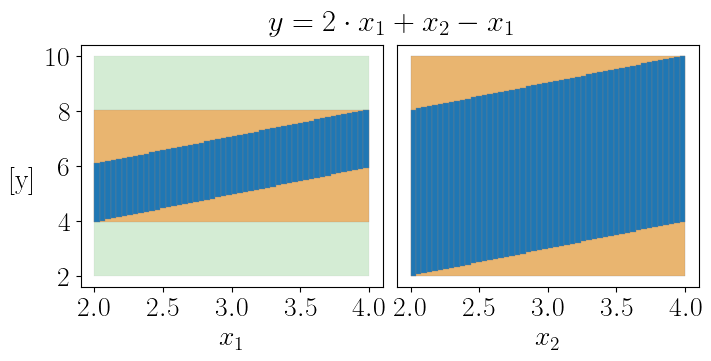

In [65]:
fig,ax = plt.subplots(1,2,figsize=(7,3.5),layout='constrained')

fig.supylabel('[y]', fontsize=20, rotation=0)
fig.suptitle(r'$y=2 \cdot x_1+x_2-x_1$', fontsize=22, x=0.55)

fig,ax[0] = plotbox(x1,y_infl,ax=ax[0],c='tab:green',alpha=0.2)
fig,ax[1] = plotbox(x2,y_infl,ax=ax[1],c='tab:green',alpha=0.2)
fig,ax[0] = plotbox(x1,y_int_infl_bounds[0],ax=ax[0],c='tab:orange',alpha=0.5)
fig,ax[1] = plotbox(x2,y_int_infl_bounds[1],ax=ax[1],c='tab:orange',alpha=0.5)

for i in range(n):
    fig,ax[0] = plotbox(x1si[i],y_int_infl[0,i],ax=ax[0],c='tab:blue')
    fig,ax[1] = plotbox(x2si[i],y_int_infl[1,i],ax=ax[1],c='tab:blue')

ax[0].set_xlabel('$x_1$',fontsize=20)
ax[1].set_xlabel('$x_2$',fontsize=20)

ax[0].set_xticks((np.linspace(2,4,5)))
ax[1].set_xticks((np.linspace(2,4,5)))

ax[0].set_yticks((np.linspace(2,10,5)))
ax[1].set_yticks((np.linspace(2,10,5)))

ax[0].tick_params('both',labelsize=20)
ax[1].tick_params('both',labelsize=20)
ax[1].tick_params('y',left=False,labelleft=False)

# plt.savefig('figures/Inflation_detection.pdf')
plt.show()

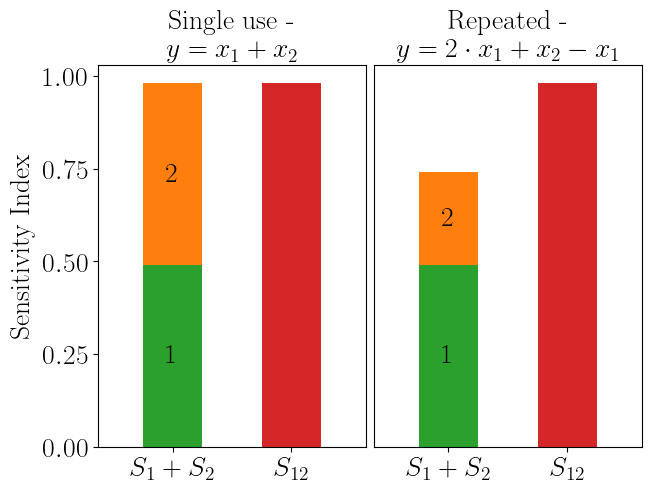

In [66]:
fig,ax = plt.subplots(1,2,layout='constrained')

x = np.array([0,0,0.2])
p1 = ax[0].bar(x[0:2],(y_si[0],y_si[1]),width=0.1,color=('tab:green','tab:orange'),bottom=(0,y_si[0]))
p2 = ax[0].bar(x[2],(y_si2[0]),width=0.1,color=('tab:red'))
q1 = ax[1].bar(x[0:2],(y_si_infl[0],y_si_infl[1]),width=0.1,color=('tab:green','tab:orange'),bottom=(0,y_si_infl[0]))
q2 = ax[1].bar(x[2],(y_si_infl2[0]),width=0.1,color=('tab:red'))

ax[0].set_xticks((x[0],x[2]),(r'$S_1+S_2$',r'$S_{12}$'),wrap=True,fontsize=20)
ax[1].set_xticks((x[0],x[2]),(r'$S_1+S_2$',r'$S_{12}$'),wrap=True,fontsize=20) #,rotation=90,ha='right'

ax[0].bar_label(p1,(r'$1$',r'$2$'),label_type='center',fontsize=20)
ax[1].bar_label(q1,(r'$1$',r'$2$'),label_type='center',fontsize=20)

ax[0].set_yticks((np.linspace(0,1.0,5)))
ax[0].tick_params('x',labelsize=20)
ax[1].tick_params('x',labelsize=20)
ax[0].tick_params('y',labelsize=20)
ax[1].tick_params('y',left=False,labelleft=False)

ax[0].set_title('Single use - \n' + r'$y=x_1+x_2$', fontsize=20)
ax[1].set_title('Repeated - \n' + r'$y=2 \cdot x_1+x_2-x_1$', fontsize=20)
ax[0].set_xlim(-0.125,0.325)
ax[1].set_xlim(-0.125,0.325)

fig.supylabel('Sensitivity Index', fontsize=20)
# plt.savefig('figures/twovar_inflation_comp.pdf')
plt.show()

## Section 6 - Test case with interaction and inflation effects

Using a product function which has many interaction effects and can be written in both single use and inflationary expressions to show the combined effects of interaction and inflation effects.

In [67]:
a,b = -2, -1
x1 = Interval(a,b)
x2 = Interval(a,b)
x3 = Interval(a,b)
x4 = Interval(a,b)
n = 50
x1si = subint(x1,n=n)
x2si = subint(x2,n=n)
x3si = subint(x3,n=n)
x4si = subint(x4,n=n)
X0 = Interval(lo=[a]*4,hi=[b]*4)

def fun_product(x): return (x[0]*x[1]*x[2])*(x[3]+1)
def fun_product_infl(x): return (x[0]*x[1]*x[2]*x[3])+(x[0]*x[1]*x[2])

In [68]:
y = fun_product(X0)
print(f'Function bounds with full interval range for all variables: {y}')
print('...')

y_si, yi_si, y_int, y_int_bounds = SSI_subinterval_combined(X0,n,fun_product,outputs=True)
print(f'Sensitivity indices for all variables in first-order: {y_si}')
print(f'Inflation indices for all variables: {yi_si}')
print(f'Subinterval enclosure bounds for all variables: {y_int_bounds}')

Function bounds with full interval range for all variables: [-0.0,8.0]
...
Sensitivity indices for all variables in first-order: [0.245   0.245   0.245   0.55125]
Inflation indices for all variables: [0. 0. 0. 0.]
Subinterval enclosure bounds for all variables: [-0.0,8.0]
[-0.0,8.0]
[-0.0,8.0]
[-0.0,8.0]


In [69]:
y_infl = fun_product_infl(X0)
print(f'Function bounds with full interval range for all variables: {y_infl}')
print('...')

y_si_infl, yi_si_infl, y_int_infl, y_int_infl_bounds = SSI_subinterval_combined(X0,n,fun_product_infl,outputs=True)
print(f'Sensitivity indices for all variables in first-order: {y_si_infl}')
print(f'Inflation indices for all variables: {yi_si_infl}')
print(f'Subinterval enclosure bounds for all variables: {y_int_infl_bounds}')

Function bounds with full interval range for all variables: [-7.0,15.0]
...
Sensitivity indices for all variables in first-order: [0.24451098 0.24451098 0.24451098 0.20045455]
Inflation indices for all variables: [0.08909091 0.08909091 0.08909091 0.        ]
Subinterval enclosure bounds for all variables: [-6.02,14.02]
[-6.02,14.02]
[-6.02,14.02]
[-7.0,15.0]


In [70]:
i = [0,1]
y_si2, yi_si2, y_int2_bounds = SSI_subinterval_combined(X0,n,fun_product,i=i)
print(f'SI_(12) = {y_si2}')
print(f'SI_(1) + SI_(2) = {y_si[0] + y_si[1]}')
print(f'I_(12) = {yi_si2}')
print('...')

i = [0,2]
y_si2a, yi_si2a, y_int2a_bounds = SSI_subinterval_combined(X0,n,fun_product,i=i)
print(f'SI_(13) = {y_si2a}')
print(f'SI_(1) + SI_(3) = {y_si[0] + y_si[2]}')
print(f'I_(13) = {yi_si2a}')
print('...')

i = [0,3]
y_si2b, yi_si2b, y_int2b_bounds = SSI_subinterval_combined(X0,n,fun_product,i=i)
print(f'SI_(14) = {y_si2b}')
print(f'SI_(1) + SI_(4) = {y_si[0] + y_si[3]}')
print(f'I_(14) = {yi_si2b}')
print('...')

i = [1,2]
y_si2c, yi_si2c, y_int2c_bounds = SSI_subinterval_combined(X0,n,fun_product,i=i)
print(f'SI_(23) = {y_si2c}')
print(f'SI_(2) + SI_(3) = {y_si[1] + y_si[2]}')
print(f'I_(23) = {yi_si2c}')
print('...')

i = [1,3]
y_si2d, yi_si2d, y_int2d_bounds = SSI_subinterval_combined(X0,n,fun_product,i=i)
print(f'SI_(24) = {y_si2d}')
print(f'SI_(2) + SI_(4) = {y_si[1] + y_si[3]}')
print(f'I_(24) = {yi_si2d}')
print('...')

i = [2,3]
y_si2e, yi_si2e, y_int2e_bounds = SSI_subinterval_combined(X0,n,fun_product,i=i)
print(f'SI_(34) = {y_si2e}')
print(f'SI_(3) + SI_(4) = {y_si[2] + y_si[3]}')
print(f'I_(34) = {yi_si2e}')
print('...')

SI_(12) = [0.429975]
SI_(1) + SI_(2) = 0.48999999999999977
I_(12) = [0.]
...
SI_(13) = [0.429975]
SI_(1) + SI_(3) = 0.48999999999999977
I_(13) = [0.]
...
SI_(14) = [0.7062125]
SI_(1) + SI_(4) = 0.7962499999999999
I_(14) = [0.]
...
SI_(23) = [0.429975]
SI_(2) + SI_(3) = 0.48999999999999977
I_(23) = [0.]
...
SI_(24) = [0.7062125]
SI_(2) + SI_(4) = 0.7962499999999999
I_(24) = [0.]
...
SI_(34) = [0.7062125]
SI_(3) + SI_(4) = 0.7962499999999999
I_(34) = [0.]
...


In [71]:
i = [0,1]
y_si_infl2, yi_si_infl2, y_int_infl2_bounds = SSI_subinterval_combined(X0,n,fun_product_infl,i=i)
print(f'SI_(12) = {y_si_infl2}')
print(f'SI_(1) + SI_(2) = {y_si_infl[0] + y_si_infl[1]}')
print(f'I_(12) = {yi_si_infl2}')
print('...')

i = [0,2]
y_si_infl2a, yi_si_infl2a, y_int_infl2a_bounds = SSI_subinterval_combined(X0,n,fun_product_infl,i=i)
print(f'SI_(13) = {y_si_infl2a}')
print(f'SI_(1) + SI_(3) = {y_si_infl[0] + y_si_infl[2]}')
print(f'I_(13) = {yi_si_infl2a}')
print('...')

i = [0,3]
y_si_infl2b, yi_si_infl2b, y_int_infl2b_bounds = SSI_subinterval_combined(X0,n,fun_product_infl,i=i)
print(f'SI_(14) = {y_si_infl2b}')
print(f'SI_(1) + SI_(4) = {y_si_infl[0] + y_si_infl[3]}')
print(f'I_(14) = {yi_si_infl2b}')
print('...')

i = [1,2]
y_si_infl2c, yi_si_infl2c, y_int_infl2c_bounds = SSI_subinterval_combined(X0,n,fun_product_infl,i=i)
print(f'SI_(23) = {y_si_infl2c}')
print(f'SI_(2) + SI_(3) = {y_si_infl[1] + y_si_infl[2]}')
print(f'I_(23) = {yi_si_infl2c}')
print('...')

i = [1,3]
y_si_infl2d, yi_si_infl2d, y_int_infl2d_bounds = SSI_subinterval_combined(X0,n,fun_product_infl,i=i)
print(f'SI_(24) = {y_si_infl2d}')
print(f'SI_(2) + SI_(4) = {y_si_infl[1] + y_si_infl[3]}')
print(f'I_(24) = {yi_si_infl2d}')
print('...')

i = [2,3]
y_si_infl2e, yi_si_infl2e, y_int_infl2e_bounds = SSI_subinterval_combined(X0,n,fun_product_infl,i=i)
print(f'SI_(34) = {y_si_infl2e}')
print(f'SI_(3) + SI_(4) = {y_si_infl[2] + y_si_infl[3]}')
print(f'I_(34) = {yi_si_infl2e}')
print('...')

SI_(12) = [0.42816476]
SI_(1) + SI_(2) = 0.48902195608782395
I_(12) = [0.26549091]
...
SI_(13) = [0.42816476]
SI_(1) + SI_(3) = 0.48902195608782395
I_(13) = [0.26549091]
...
SI_(14) = [0.42862774]
SI_(1) + SI_(4) = 0.4449655234984574
I_(14) = [0.08909091]
...
SI_(23) = [0.42816476]
SI_(2) + SI_(3) = 0.48902195608782395
I_(23) = [0.26549091]
...
SI_(24) = [0.42862774]
SI_(2) + SI_(4) = 0.4449655234984574
I_(24) = [0.08909091]
...
SI_(34) = [0.42862774]
SI_(3) + SI_(4) = 0.4449655234984574
I_(34) = [0.08909091]
...


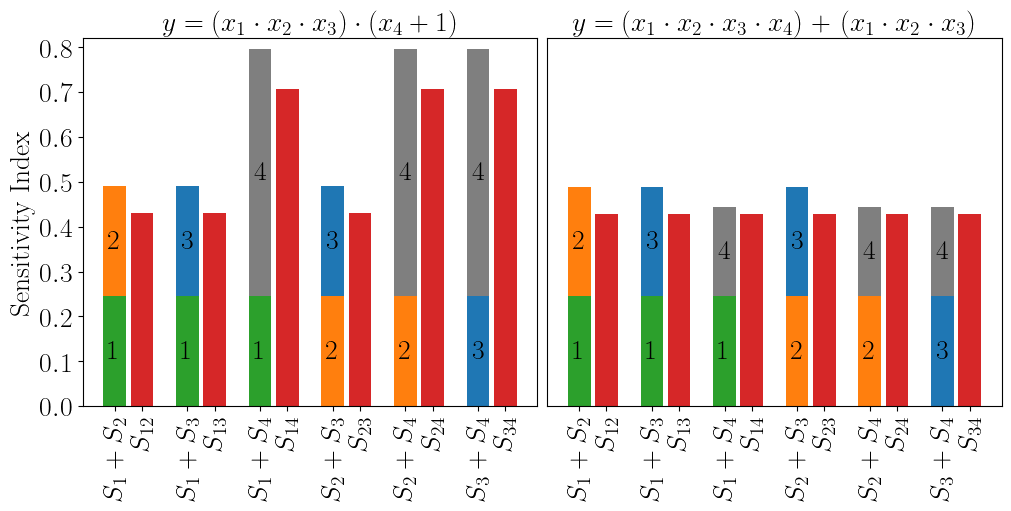

In [72]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5),layout='constrained')

x = np.array([0,0.3,0.8,1.1,1.6,1.9,2.4,2.7,3.2,3.5,4,4.3])
p1 = ax1.bar(x[0::2],(y_si[0],y_si[0],y_si[0],y_si[1],y_si[1],y_si[2]),width=0.25,
       color=('tab:green','tab:green','tab:green','tab:orange','tab:orange','tab:blue'))

p2 = ax1.bar(x[0::2],(y_si[1],y_si[2],y_si[3],y_si[2],y_si[3],y_si[3]),width=0.25,
       color=('tab:orange','tab:blue','tab:gray','tab:blue','tab:gray','tab:gray'),
       bottom=(y_si[0],y_si[0],y_si[0],y_si[1],y_si[1],y_si[2]))

q1 = ax1.bar(x[1::2],(y_si2[0],y_si2a[0],y_si2b[0],y_si2c[0],y_si2d[0],y_si2e[0]),width=0.25,
       color=('tab:red','tab:red','tab:red','tab:red','tab:red','tab:red'))

ax1.set_xticks(x,(r'$S_1+S_2$',r'$S_{12}$',r'$S_1+S_3$',r'$S_{13}$',r'$S_1+S_4$',r'$S_{14}$',r'$S_2+S_3$',r'$S_{23}$',r'$S_2+S_4$',r'$S_{24}$',r'$S_3+S_4$',r'$S_{34}$'),
              rotation=90,wrap=True,fontsize=20)

ax1.bar_label(p1,(r'$1$',r'$1$',r'$1$',r'$2$',r'$2$',r'$3$'),label_type='center',fontsize=20)
ax1.bar_label(p2,(r'$2$',r'$3$',r'$4$',r'$3$',r'$4$',r'$4$'),label_type='center',fontsize=20)

ax1.set_ylim(0,0.82)
ax1.set_yticks((np.linspace(0,0.8,9)))
ax1.tick_params('both',labelsize=20)
ax1.set_ylabel('Sensitivity Index',fontsize=20)
ax1.set_title(r'$y = (x_1 \cdot x_2 \cdot x_3) \cdot (x_4+1)$', fontsize=20, wrap=True)


p1 = ax2.bar(x[0::2],(y_si_infl[0],y_si_infl[0],y_si_infl[0],y_si_infl[1],y_si_infl[1],y_si_infl[2]),width=0.25,
       color=('tab:green','tab:green','tab:green','tab:orange','tab:orange','tab:blue'))

p2 = ax2.bar(x[0::2],(y_si_infl[1],y_si_infl[2],y_si_infl[3],y_si_infl[2],y_si_infl[3],y_si_infl[3]),width=0.25,
       color=('tab:orange','tab:blue','tab:gray','tab:blue','tab:gray','tab:gray'),
       bottom=(y_si_infl[0],y_si_infl[0],y_si_infl[0],y_si_infl[1],y_si_infl[1],y_si_infl[2]))

q1 = ax2.bar(x[1::2],(y_si_infl2[0],y_si_infl2a[0],y_si_infl2b[0],y_si_infl2c[0],y_si_infl2d[0],y_si_infl2e[0]),width=0.25,
       color=('tab:red','tab:red','tab:red','tab:red','tab:red','tab:red'))

ax2.set_xticks(x,(r'$S_1+S_2$',r'$S_{12}$',r'$S_1+S_3$',r'$S_{13}$',r'$S_1+S_4$',r'$S_{14}$',r'$S_2+S_3$',r'$S_{23}$',r'$S_2+S_4$',r'$S_{24}$',r'$S_3+S_4$',r'$S_{34}$'),
              rotation=90,wrap=True,fontsize=20)

ax2.bar_label(p1,(r'$1$',r'$1$',r'$1$',r'$2$',r'$2$',r'$3$'),label_type='center',fontsize=20)
ax2.bar_label(p2,(r'$2$',r'$3$',r'$4$',r'$3$',r'$4$',r'$4$'),label_type='center',fontsize=20)

ax2.set_ylim(0,0.82)
ax2.set_yticks((np.linspace(0,0.8,9)))
ax2.tick_params('x',labelsize=20)
ax2.tick_params('y',left=False,labelleft=False)
ax2.set_title(r'$y = (x_1 \cdot x_2 \cdot x_3 \cdot x_4)$ + $(x_1 \cdot x_2 \cdot x_3)$', fontsize=20)

# plt.savefig('figures/product_combined.pdf')
plt.show()